In [1]:
# 필요한 라이브러리 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
# sklearn.linear_model 모듈의 Lasso 클래스 로딩
from sklearn.linear_model import Lasso

# 데이터셋 로딩
boston = load_boston()

# 데이터셋 분할
# test_size=0.3, random_state=12 로 지정하세요.
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=12)

In [2]:
# 규제를 위한 alpha 값 초기화
alpha = 0.1

# Lasso 클래스 객체 생성
lasso = Lasso(alpha=alpha)

# fit() 을 통한 규제 학습 수행
lasso.fit(x_train, y_train)

# predict() 를 통한 학습된 모델 기반 예측
lasso_pred = lasso.predict(x_test)

In [3]:
# score() 를 통해 회귀 모델의 R^2 출력
# 학습된 모델에 대한 R^2 계산
r2_train = lasso.score(x_train, y_train)
r2_test = lasso.score(x_test, y_test)
print('Training-datasset R2 : {0:.3f}'.format(r2_train))
print('Test-datasset R2 : {0:.3f}'.format(r2_test))

Training-datasset R2 : 0.736
Test-datasset R2 : 0.693


In [4]:
# 회귀 계수 저장을 위한 Seriess 객체 생성 및 출력
lasso_coef_table = pd.Series(data=np.round(lasso.coef_,1), index=boston.feature_names)
print('Lasso Regression Coefficients :')
print(lasso_coef_table.sort_values(ascending=False))

Lasso Regression Coefficients :
RM         3.4
CHAS       1.8
RAD        0.3
ZN         0.1
B          0.0
TAX       -0.0
AGE        0.0
NOX       -0.0
INDUS      0.0
CRIM      -0.1
PTRATIO   -0.6
LSTAT     -0.7
DIS       -1.1
dtype: float64


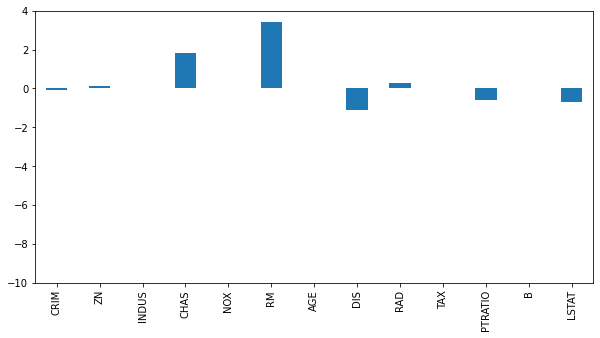

In [5]:
# 막대그래프 시각화 
plt.figure(figsize=(10,5))
lasso_coef_table.plot(kind='bar')
plt.ylim(-10, 4)
plt.show()